<a href="https://colab.research.google.com/github/debaggi/Junior-Data-Analyst-Cases/blob/main/cases_eshop_bet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notes:

* random.randint()
* random.choice()
* random.uniform()

In [ ]:
n_records = 9
uni_random = np.round(np.random.uniform(1, 9, n_records), 2)
int_random = np.random.randint(1, 9, n_records)
ray_leigh_random = np.round(np.random.rayleigh(1, 8), 2)
choice_random = np.random.choice(range(1, 9), n_records)


print(f'uni_random: {uni_random}')
print(f'ray_leigh_random: {ray_leigh_random}')


print(f'int_random: {int_random}')
print(f'choice_random: {choice_random}')

# Задачи для технического интервью:


Эти задачи помогут оценить навыки кандидата в аналитике, моделировании, а также в интерпретации данных и принятии решений на основе анализа.

In [ ]:
import numpy as np
import pandas as pd

## 1. **Задача на анализ данных и статистику**

**Описание:**
У вас есть набор данных с историей продаж продуктов в интернет-магазине за последние 3 года. Данные включают дату продажи, идентификатор продукта, количество проданных единиц, цену за единицу и общую стоимость заказа. Требуется провести исследование данных и ответить на следующие вопросы:

- Какие продукты имеют наибольший и наименьший объём продаж? Как эти продукты распределяются по времени (по месяцам, кварталам)?
- Определите сезонные колебания продаж. Есть ли в данных признаки сезонности? Как они выражаются?
- Постройте и проанализируйте распределение продаж для каждого продукта. Примените соответствующие статистические тесты для определения значимости обнаруженных паттернов.

- Умение обрабатывать и анализировать данные (например, с помощью Python или R).
- Знание статистических методов (гистограммы, тесты на нормальность, сезонные компоненты, t-тест, ANOVA).

In [ ]:
pip install faker

In [ ]:
from faker import Faker

In [ ]:
fake = Faker()
np.random.seed(24)

n_records = 1000
n_products = 100

data = {'Date': [fake.date_between(start_date='-3y', end_date='today') for _ in range(n_records)],
        'Product_id': np.random.choice(range(1, n_products + 1), n_records),
        'Quantity':np.random.randint(1, 21, n_records),}

In [ ]:
sales_df = pd.DataFrame(data)

price_map = {product_id: np.random.uniform(10, 500) for product_id in data['Product_id']}

sales_df['PPU, $'] = [price_map[id] for id in data['Product_id']]
sales_df['PPU, $'] = sales_df['PPU, $'].apply(lambda x: np.round(x, 2))
sales_df['Revenue, $'] = sales_df['PPU, $'] * sales_df['Quantity']
sales_df['Marketing_spend, $'] = np.round(np.random.uniform(100, 500, 1000), 2)

sales_df = sales_df.set_index('Product_id')

sales_df.to_csv('sales_df.csv')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
sales_df = pd.read_csv('/content/Sales Dataframe.csv')

In [ ]:
sales_df.info()

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [ ]:
sales_gdf = sales_df.groupby('Product_id')['Revenue, $'].agg('sum')

revenue_min, revenue_max = sales_gdf.min(), sales_gdf.max()
revmin_product_id, revmax_product_id = sales_gdf.argmin()+1, sales_gdf.argmax()+1

print(f'{revmin_product_id}: {revenue_min}$')
print(f'{revmax_product_id}: {revenue_max}$')

In [ ]:
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month

revenue_by_year = sales_df.groupby(['Year', 'Product_id'])['Revenue, $'].agg('sum')
revenue_by_year_df = pd.DataFrame(revenue_by_year)
revenue_by_year_df.head(3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# корреляция между маркетинговыми затратами и продажами
correlation = sales_df['Marketing_spend, $'].corr(sales_df['Revenue, $'])
correlation

In [ ]:
sns.scatterplot(x='Marketing_spend, $', y='Revenue, $', data=sales_df)
plt.title(f'Correlation between Marketing Spend and Revenue: {correlation:.2f}', fontsize=9)
plt.xlabel('Marketing spend, $', fontsize=7)
plt.ylabel('Revenue, $', fontsize=7)
plt.show()

# построение линейной регрессии
X = sales_df['Marketing_spend, $']
Y = sales_df['Revenue, $']

X = sm.add_constant(X)

# модель линейной регресии
model = sm.OLS(Y, X).fit()
model_summary = model.summary()

model_summary

# Выводы
* Корреляция между маркетинговыми затратами и продажами в разрезе товаров равна примерно 0.04, которая показывает слабую связь между двумя переменными.
* Линейная регрессия: коэффициент перед переменной Marketing_spend = 0.862, что означает, увеличение маркетиговых затрат на одну единицу связано с увеличением продаж на 0.862 единицы.
*

## 2. **Задача на построение прогнозной модели**


**Описание:**
Вам необходимо построить прогнозную модель для предсказания объёма продаж в следующем квартале. Данные включают предыдущие исторические данные о продажах, маркетинговые затраты, данные о конкурентах и макроэкономические индикаторы.

- Выберите подходящий алгоритм для построения модели и объясните ваш выбор.
- Постройте модель и оцените её качество (MSE, RMSE, MAE и т.д.).
- Проанализируйте важность признаков и объясните, какие факторы наиболее сильно влияют на прогнозы.
- Примените модель к новым данным (например, прогноз на следующий квартал).

**Ожидаемые навыки:**
- Знание методов машинного обучения (линейная регрессия, градиентный бустинг, случайные леса и т.д.).
- Умение оценивать и интерпретировать результаты модели.
- Навыки работы с библиотеками для машинного обучения (например, scikit-learn, XGBoost).

##3. **Задача на интерпретацию результатов и бизнес-рекомендации**

**Описание:**
Предположим, что вы завершили анализ данных и построили модель прогнозирования. Модель показала, что в ближайшем квартале ожидается значительное снижение продаж для одной из продуктовых категорий.

- Проанализируйте возможные причины снижения продаж, исходя из доступных данных.
- Сформулируйте бизнес-рекомендации для улучшения ситуации. Например, предложите маркетинговую стратегию или изменения в продуктовой линейке, основываясь на ваших выводах.
- Подготовьте краткий отчёт для руководства, где объясните свои выводы и предложенные действия.

**Ожидаемые навыки:**
- Способность интерпретировать результаты анализа и модели.
- Понимание бизнес-процессов и умение генерировать практические рекомендации.
- Навыки презентации и коммуникации, умение доносить сложные технические идеи в простой форме.

# **Продуктовая аналитика. Регрессионная модель**

Задача по продуктовой аналитике сервиса, который предоставляет пользователю возможность сделать ставки на спортивные олимпиады. Создай датасет (дотаяет из 20 записей) для анализа выручки, анализа финансовой модели продукта с учетом издержек в разрезе кварталов 5 лет с момента запуска сервиса. Для задачи должна быть построена регрессивная модель. В результате должен быть построен дашборд для мониторинга за ключевыми показателями сервиса ставок на спортивные олимпиады.


1. **Датасет**:
	- Содержит данные по выручке и издержкам сервиса ставок на спортивные олимпиады.
	- 20 записей будут охватывать 5 лет (по 4 квартала в каждом году).
	- Данные включают:
		- Год и квартал.
		- Выручка (сумма ставок).
		- Издержки (затраты на инфраструктуру, маркетинг, выплаты победителям и т.д.).
		- Чистая прибыль (выручка минус издержки).
		- Число активных пользователей (количество пользователей, сделавших хотя бы одну ставку за квартал).
		- Средний размер ставки.
2. **Регрессивная модель**:
	- На основе датасета будет построена модель, позволяющая предсказывать чистую прибыль на основе выручки, издержек и числа активных пользователей.
3. **Дашборд**:
	- Визуализация данных: тренды по выручке, издержкам, числу активных пользователей и чистой прибыли по кварталам.
	- Ключевые показатели (KPI) для мониторинга работы сервиса.
	- Прогнозы на основе регрессионной модели.

Сначала я сгенерирую датасет, затем построим регрессивную модель и дашборд. Начнем с генерации датасета.

Датасет для анализа финансовой модели сервиса ставок на спортивные олимпиады создан. В нем содержится 20 записей, представляющих квартальные данные за 5 лет. Данные включают информацию о выручке, издержках, чистой прибыли, количестве активных пользователей и среднем размере ставки.

Теперь перейдем к построению регрессионной модели для прогнозирования чистой прибыли на основе других показателей. После этого создадим дашборд для визуализации ключевых показателей.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(42)

number_records = 100

# год
years = np.random.randint(1,6,number_records)
# квартал
quater = np.random.randint(1,5, number_records)
# выручка
revenue = np.random.uniform(10000, 50000, number_records).round(2)
# издержки
expenses = np.random.uniform(5000, 20000, number_records).round(2)
# активные пользователи
active_users = np.random.randint(1000, 5000, number_records)
# средняя ставка
average_bet_size = np.random.uniform(20, 50, number_records).round(2)
# чистая выручка
profit = (revenue - expenses).round(2)

In [ ]:
dataset = {'year':years,
           'quater':quater,
           'revenue':revenue,
           'expenses':expenses,
           'active users':active_users,
           'avg bet size':average_bet_size,
           'profit':profit}

df = pd.DataFrame(data=dataset)
df

## Комментарий

**MSE**

> метрика, отражающая среднее значение квадратов ошибок между фактическими и предсказанными значениями.
```
MSE = 1/n (SUM_i_n(y_fact - y_pred)^2)
```
 - показывает насколько предсказания модели приближены к фактическис данным.
 - метрика чувствительна, тк для ее вычисления используется квадрат разности значений.

 **model.coef_**
 > коэффициенты модели линейной регрессии показывают, насколько изменяется целевая переменная при изменении одного из признаков на одну единицу, при условии, что остальные признаки остаютс неизмененными.

 ```
 model.coef_
 ```

 0.8 [= model.coef_]  * revenue -> profit
если коэффициент при атрибуте revenue равен x, тогда при увеличении revenue на одну условную единицу, то profit увеличится в среднем на x (при условии, что остальные факторы останутся постоянными).


**model.intercept_**
> значение целевой переменной при условии, что все предикторы равны нулю. Базовое значение переменной.
```
model.intercept_
```

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# признаки
X = df[['revenue', 'expenses', 'active users']]
# целевая переменная
y = df['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse, model.coef_, model.intercept_

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Выбираем целевую переменную и признаки
X = df[['revenue', 'expenses', 'active users']]
y = df['profit']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем линейную регрессию
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем модель с помощью средней квадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)


txt = f'mse =  {mse}, \nmodel.coef_ = {model.coef_}, \nmodel.intercept_ = {model.intercept_} '
print(txt)

# Графики

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4,2,figsize=(20,20))
fig.suptitle('KPI', fontsize=14)

sns.lineplot(ax=axes[0,0], x='year_quater', y='profit', data=df, marker='.', markersize=15, color='green')
sns.lineplot(ax=axes[0,1], data=df_short, x='year_quater', y='active users',marker='.', markersize=15, color='orange')

sns.lineplot(ax=axes[1,0], data=df_short, y='active users', x='year_quater',marker='.', markersize=15)
axes[1,0].set_title('Active users(QY)')
axes[1,0].set_xlabel('Active users(QY)')
axes[1,0].set_ylabel('QY')
axes[1,0].tick_params(axis='x', rotation=45)

df['year_quater'] = df['year'].astype(str) + '-Q' + df['quater'].astype(str)
df = df.sort_values(['year', 'quater'])
df_short = df[['year_quater', 'avg bet size', 'active users', 'revenue', 'expenses', 'profit']]
sns.lineplot(ax=axes[1,1], data=df_short, y='avg bet size', x='year_quater', color='purple', marker='.', markersize=15)

df_grouped = df.groupby('year')['profit'].agg('sum')
df_grouped.plot(ax=axes[2,0], kind='pie', autopct='%1.1f%%', fontsize=7)
axes[2,0].set_title('Profit(Y)')
axes[2,0].set_ylabel('')

qy_profit = df_short.groupby(['year_quater'])['profit'].agg('sum')
qy_profit.plot(ax=axes[2,1],kind='pie', autopct='%1.1f%%', fontsize=7)
axes[2,1].set_title('Profit(QY)')
axes[2,1].set_ylabel('')
axes[2,1].tick_params(axis='x', rotation=45)


sns.lineplot(ax=axes[3,0],data=df_short, y='expenses', x='year_quater', marker='o', markersize=5, color='red', label='Expenses')
sns.lineplot(ax=axes[3,0], data=df_short, y='revenue', x='year_quater', marker='.', markersize=5, color='lightgreen', label='Revenue')
sns.lineplot(ax=axes[3,0], data=df_short, y='profit', x='year_quater', marker='*', markersize=5, color='green', label='Profit')

plt.tight_layout()
plt.show()

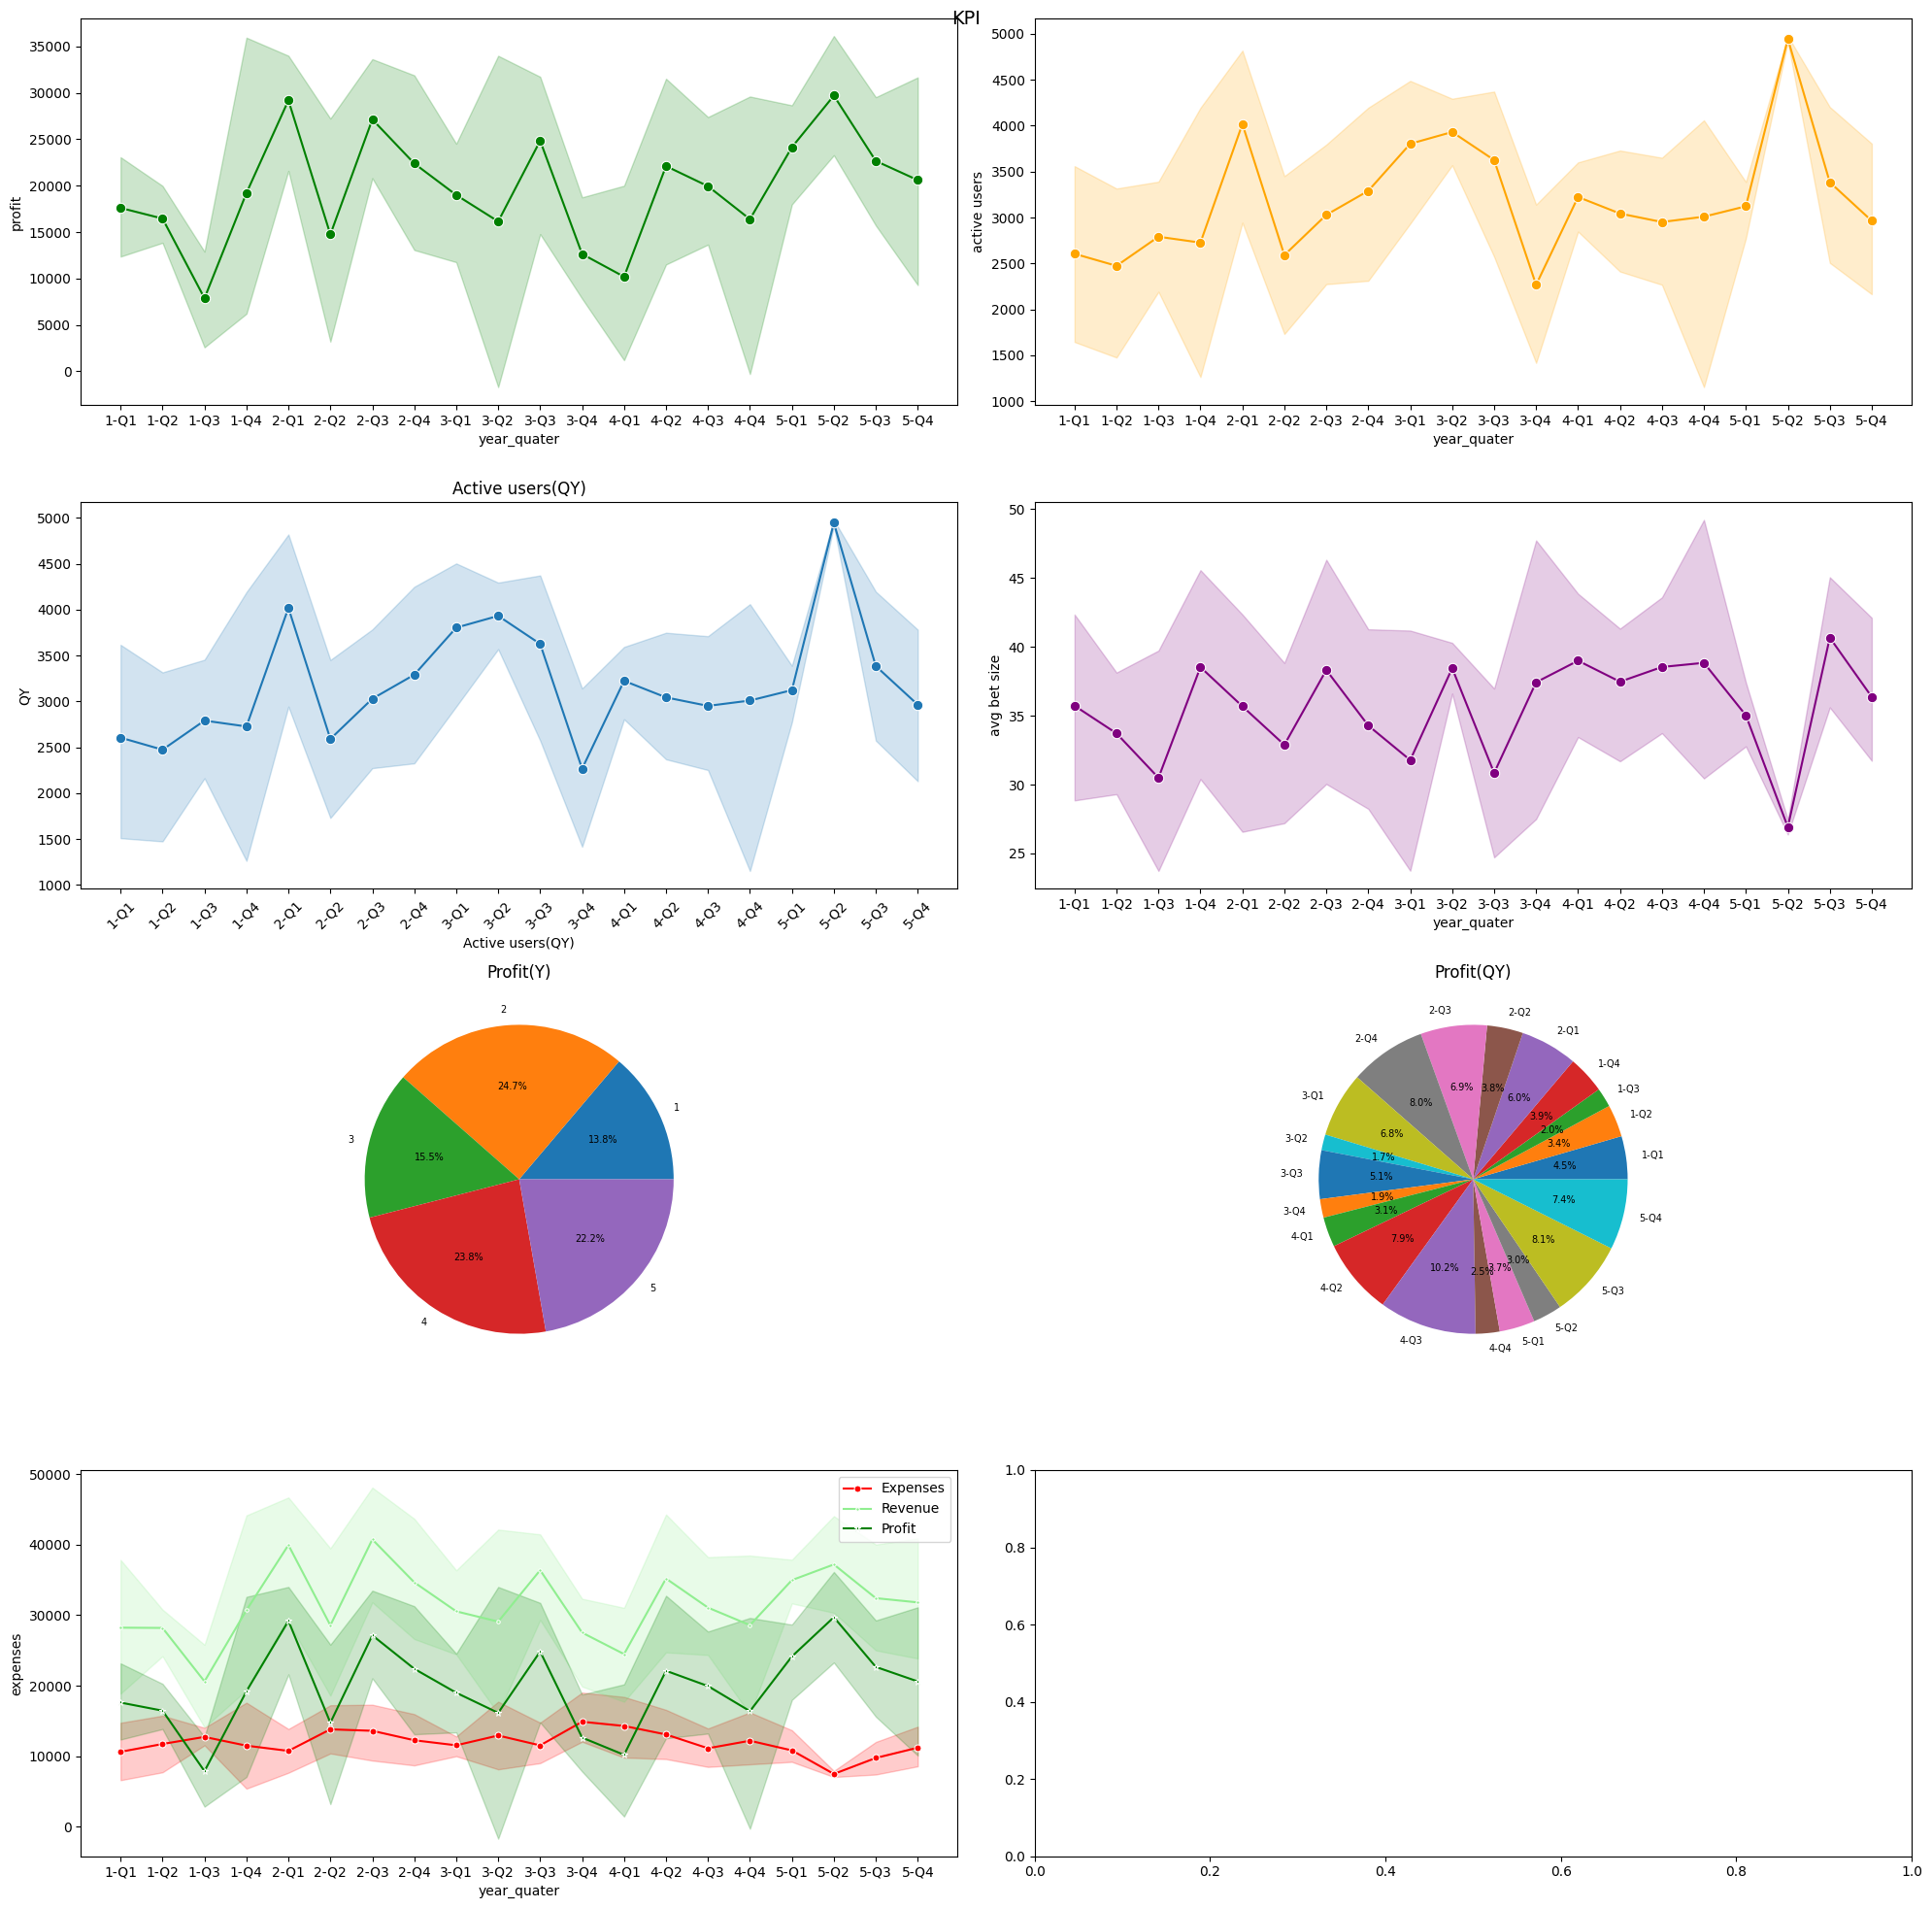